In [155]:
import pandas as pd
from read_data import read_normal_data
import matplotlib.pyplot as plt
import numpy as np
from numpy import log10
#plt.style.use('seaborn-deep')

In [2]:
scores = read_normal_data()

In [3]:
scores

1        1        1        1         1         1         1         1    \
1    NaN  2.98956  3.98005  1.27962 -0.913402  4.345110   3.84708  -5.06600   
1    NaN      NaN  3.58654  1.78807 -0.734666 -0.264842  -4.16717  -3.25270   
1    NaN      NaN      NaN  5.31478  2.987240 -0.206933  -9.01298  -4.32923   
1    NaN      NaN      NaN      NaN  2.540760 -2.147400  -7.25195   2.64723   
1    NaN      NaN      NaN      NaN       NaN -3.907330 -11.46310 -14.59690   
..   ...      ...      ...      ...       ...       ...       ...       ...   
273  NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN   
274  NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN   
275  NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN   
275  NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN   
275  NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN   

         2        2    ...      272      273      273      273      273  \
1   -593.687 -546.436  ... -203.473 -47.4087 -50.7225 -40.3103 -44.4496   
1   -579.467 -527.625  ... -191.020 -58.5700 -56.5531 -46.5963 -51.6248   
1   -605.498 -553.169  ... -202.307 -63.2234 -70.4913 -53.0223 -57.7262   
1   -594.007 -537.202  ... -214.485 -50.4183 -56.6684 -40.2463 -44.4627   
1   -605.290 -556.872  ... -219.265 -49.1571 -62.7073 -42.1376 -45.0429   
..       ...      ...  ...      ...      ...      ...      ...      ...   
273      NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   
274      NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   
275      NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   
275      NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   
275      NaN      NaN  ...      NaN      NaN      NaN      NaN      NaN   

         273      274       275        275        275  
1   -55.6385 -148.619 -107.3900  -81.78640  -86.85000  
1   -64.2001 -161.203  -97.3658  -77.08140  -78.44140  
1   -69.7448 -147.941 -115.6440  -82.09840  -81.51440  
1   -56.5126 -155.666 -118.0780  -86.60320  -76.40450  
1   -59.4305 -170.280 -140.3550 -110.94500 -106.22100  
..       ...      ...       ...        ...        ...  
273      NaN -129.720 -151.2690 -141.11900 -136.98500  
274      NaN      NaN -167.5180 -178.15100 -172.21900  
275      NaN      NaN       NaN    5.37802  -13.14140  
275      NaN      NaN       NaN        NaN    9.56213  
275      NaN      NaN       NaN        NaN        NaN  

[943 rows x 943 columns]

In [4]:
genuine = list()
imposter = list()

In [5]:
x = 0
y = 0
for x in range(943):
    for y in range(943):
        val = scores.iloc[x,y]
        if scores.index[x] == scores.columns[y]:
            genuine.append(val)
        else:
            imposter.append(val)

In [6]:
genuine = pd.Series(genuine)
genuine.dropna(inplace=True)

imposter = pd.Series(imposter)
imposter.dropna(inplace=True)

In [7]:
df = pd.DataFrame()
df['genuine'] = genuine
df['imposter'] = imposter

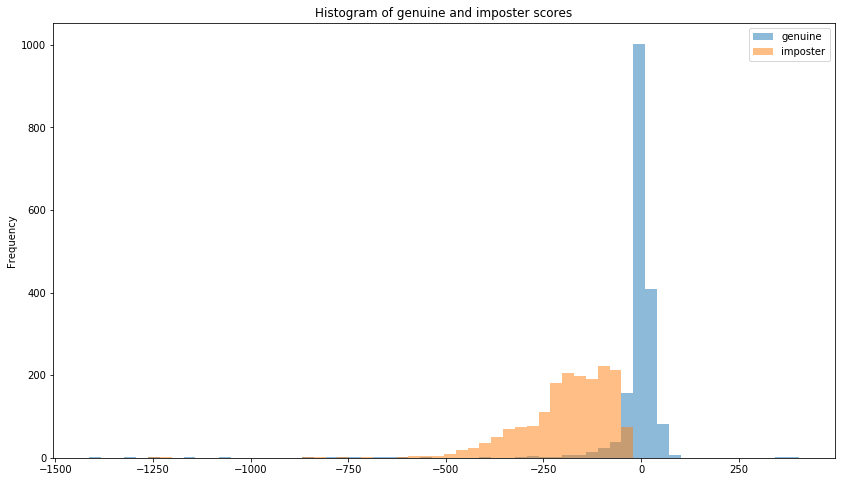

In [73]:
df.plot(kind='hist', bins=60, figsize = (14, 8), alpha=.5, title='Histogram of genuine and imposter scores')

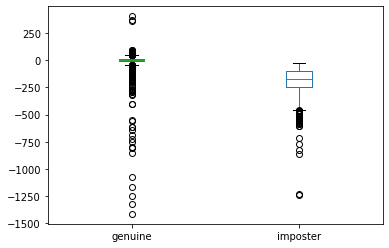

In [30]:
df.plot(kind='box')

In [26]:
def FMR(threshold, data):
    return len(data.loc[data['imposter'] >= threshold])/len(data)

In [27]:
def FNMR(threshold, data):
    return len(data.loc[data['genuine'] < threshold])/len(data)

In [116]:
roc_data = pd.DataFrame()

In [117]:
for t in range(-600, 110, 5):
    roc_data = roc_data.append({
        'threshold': t,
        'False Match Rate': FMR(t, df),
        'False Non-Match Rate': FNMR(t, df),
        'True Match Rate': 1-FNMR(t, df)
    }, ignore_index=True)
    
roc_data['intersect'] = roc_data['False Match Rate'].copy()

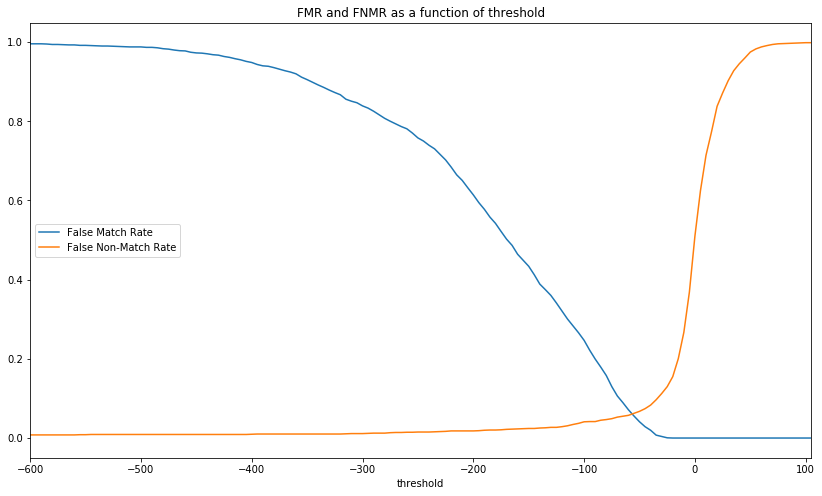

In [125]:
roc_data.plot(x='threshold', y=['False Match Rate', 'False Non-Match Rate'], figsize=(14, 8), title='FMR and FNMR as a function of threshold')

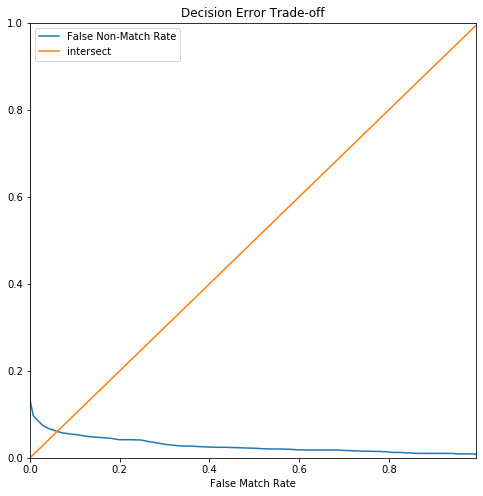

In [129]:
roc_data.plot(x='False Match Rate', y=['False Non-Match Rate', 'intersect'], ylim=(0, 1), figsize=(8, 8), title='Decision Error Trade-off')

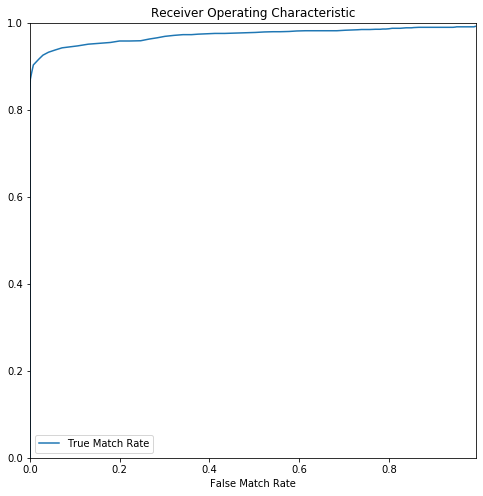

In [127]:
roc_data.plot(x='False Match Rate', y=['True Match Rate'], ylim=(0, 1), figsize=(8, 8), title='Receiver Operating Characteristic')

In [147]:
roc_data['logFMR'] = log10(roc_data['False Match Rate'])
roc_data['logFNMR'] = log10(roc_data['False Non-Match Rate'])
roc_data['logTMR'] = log10(roc_data['True Match Rate'])

In [159]:
roc_data = roc_data.replace([np.inf, -np.inf], np.nan)

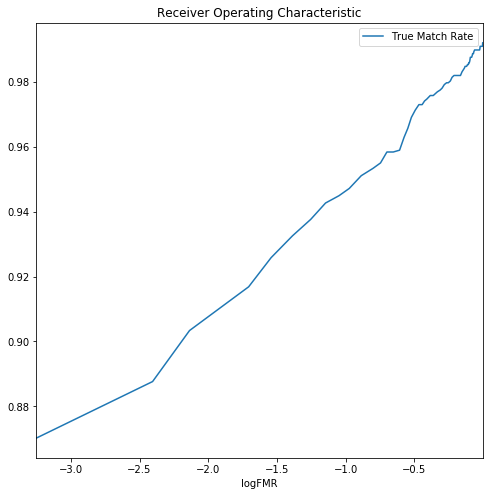

In [161]:
roc_data.plot(x='logFMR', y=['True Match Rate'], figsize=(8, 8), title='Receiver Operating Characteristic')

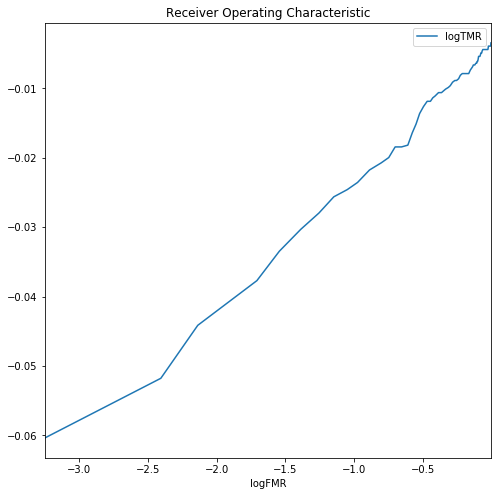

In [162]:
roc_data.plot(x='logFMR', y=['logTMR'], figsize=(8, 8), title='Receiver Operating Characteristic')

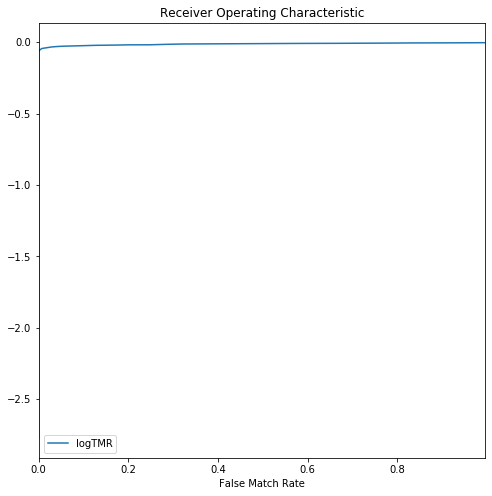

In [163]:
roc_data.plot(x='False Match Rate', y=['logTMR'], figsize=(8, 8), title='Receiver Operating Characteristic')

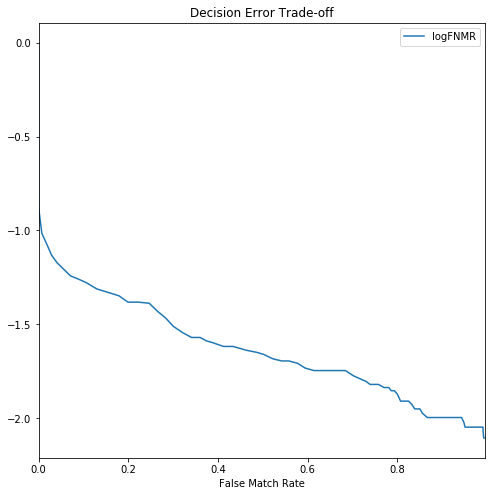

In [166]:
roc_data.plot(x='False Match Rate', y=['logFNMR'], figsize=(8, 8), title='Decision Error Trade-off')

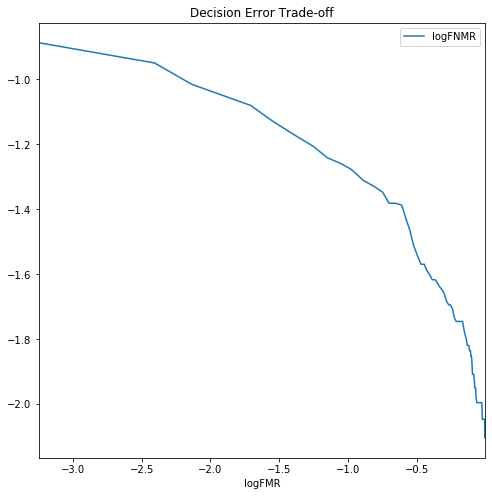

In [167]:
roc_data.plot(x='logFMR', y=['logFNMR'], figsize=(8, 8), title='Decision Error Trade-off')

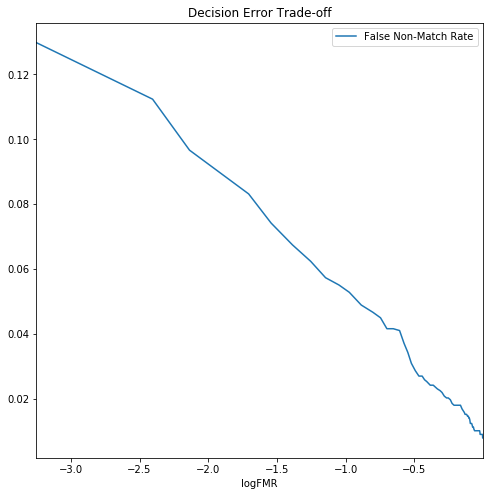

In [168]:
roc_data.plot(x='logFMR', y=['False Non-Match Rate'], figsize=(8, 8), title='Decision Error Trade-off')